In [0]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import models
from torchvision import transforms

In [0]:
# use VGG 19 model
vgg = models.vgg19(pretrained=True).eval()
for param in vgg.parameters():
    param.requires_grad = False

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 574673361/574673361 [00:09<00:00, 61035237.64it/s]


In [0]:
# skip these lines if not using Colab
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# skip this lines if not using Colab
cd 'drive/My Drive/Colab Notebooks/small projects/neural-style-transfer'

/content/drive/My Drive/Colab Notebooks/small projects/neural-style-transfer


In [0]:
from utils import *

In [0]:
# create name for the layers we need
LAYERS = {
    '0': 'conv1_1',
    '5': 'conv2_1',
    '10': 'conv3_1',
    '19': 'conv4_1',
    '21': 'conv4_2',
    '28': 'conv5_1'
}
# style layers' weights (can be tuned)
STYLE_LAYERS = {'conv1_1': 0.2,
                 'conv2_1': 0.2,
                 'conv3_1': 0.2,
                 'conv4_1': 0.2,
                 'conv5_1': 0.2}

In [0]:
if torch.cuda.torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'

### Some examples
#### 1. Example 1

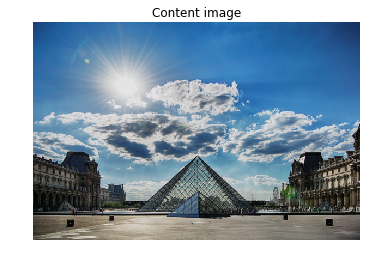

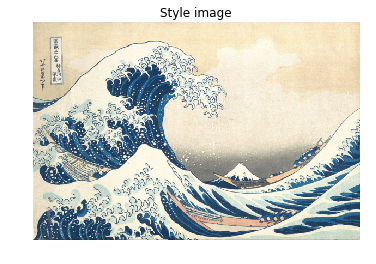

In [0]:
content_img = load_image('images/louvre.jpg')
style_img = load_image('images/blue_wave.jpg')
imshow(content_img, 'Content image')
imshow(style_img, 'Style image')

In [0]:
# initialize generated image the same as content image, can intialize in a different way
generated_img = content_img.clone()

In [0]:
output = train(vgg, content_img, style_img, generated_img, LAYERS, STYLE_LAYERS, alpha=1, beta=1e3, learning_rate=0.1, epochs=500, device=device, print_every=50)

epoch: 0, total loss = 1852.452393, content loss = 0.000000, style loss = 1.852452
epoch: 50, total loss = 65.314857, content loss = 2.828173, style loss = 0.062487
epoch: 100, total loss = 29.949348, content loss = 2.906401, style loss = 0.027043
epoch: 150, total loss = 22.797747, content loss = 2.964340, style loss = 0.019833
epoch: 200, total loss = 17.724628, content loss = 2.927565, style loss = 0.014797
epoch: 250, total loss = 15.250182, content loss = 2.942663, style loss = 0.012308
epoch: 300, total loss = 14.308853, content loss = 2.920835, style loss = 0.011388
epoch: 350, total loss = 12.595974, content loss = 2.951642, style loss = 0.009644
epoch: 400, total loss = 12.481860, content loss = 2.983733, style loss = 0.009498
epoch: 450, total loss = 12.079104, content loss = 2.993609, style loss = 0.009085


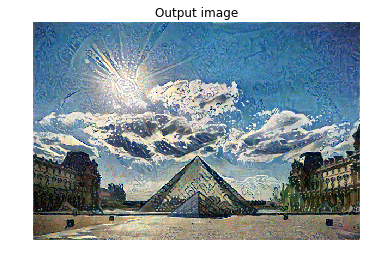

In [0]:
imshow(output, 'Output image')
imsave(output, 'images/output/louvre_wave.jpg')

#### 2. Example 2

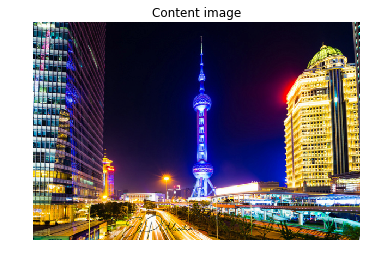

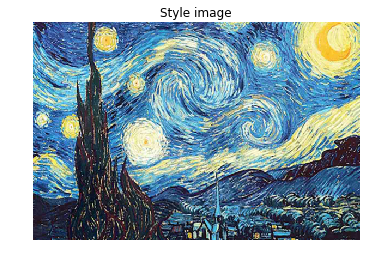

In [0]:
content_img = load_image('images/shanghai.jpg')
style_img = load_image('images/starry-night.jpg')
imshow(content_img, 'Content image')
imshow(style_img, 'Style image')

generated_img = content_img.clone()

In [0]:
output = train(vgg, content_img, style_img, generated_img, LAYERS, STYLE_LAYERS, alpha=1, beta=1e4, learning_rate=0.1, epochs=500, device=device, print_every=50)

epoch: 0, total loss = 23893.798828, content loss = 0.000000, style loss = 2.389380
epoch: 50, total loss = 250.497406, content loss = 4.051558, style loss = 0.024645
epoch: 100, total loss = 106.676651, content loss = 4.135066, style loss = 0.010254
epoch: 150, total loss = 73.141052, content loss = 4.162687, style loss = 0.006898
epoch: 200, total loss = 57.231869, content loss = 4.173222, style loss = 0.005306
epoch: 250, total loss = 47.591850, content loss = 4.188150, style loss = 0.004340
epoch: 300, total loss = 41.153946, content loss = 4.190822, style loss = 0.003696
epoch: 350, total loss = 36.571087, content loss = 4.194001, style loss = 0.003238
epoch: 400, total loss = 33.212341, content loss = 4.194143, style loss = 0.002902
epoch: 450, total loss = 30.639612, content loss = 4.188498, style loss = 0.002645


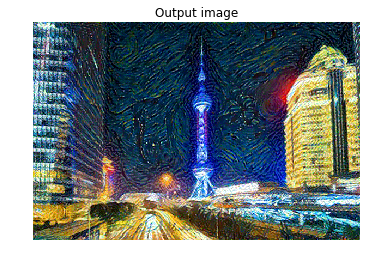

In [0]:
imshow(output, 'Output image')
imsave(output, 'images/output/shanghai_starry.jpg')